In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

870


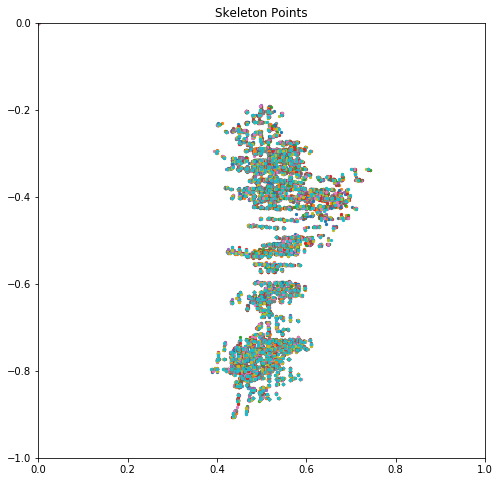

In [2]:
BASE_DIR = "D:\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\DatasetPosePerDancer\Tendu"

#run through each dancer folder and plot the coordinates
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                #print(file_path)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                sc = ax.scatter(x,y, s=5)
                count+=1
plotCoordinates()
print(count)

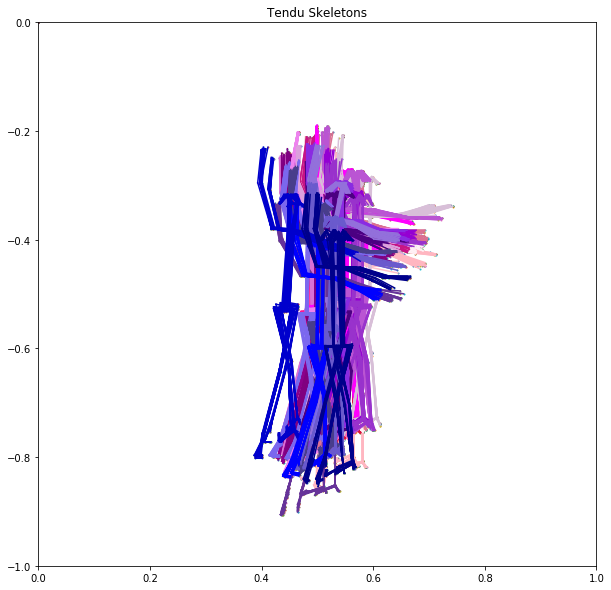

In [3]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
allXList =[]
allYList = []
dancerNum = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title('Tendu Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                allXList.append(x)
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                allYList.append(y)
                sc = ax.scatter(x,y, s=1)
                for bone in bones:
                    #Remove the 0,0 xy coordinates plotting
                    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                        #print("zero values for joint: ",x.index(x[bone[0]]))
                        #print("zero values for joint: ",x.index(x[bone[1]]))
                        continue
                    #ax.plot([x_values],[y_values])
                    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        dancerNum+=1
plotSkeletons()

In [4]:
np.save('allTenduXList.npy', allXList)
np.save('allTenduYList.npy', allYList)

In [5]:
xloaded = np.load('allTenduXList.npy')
print(xloaded)
print(len(xloaded))
yloaded = np.load('allTenduYList.npy')
print(yloaded)
print(len(yloaded))

[[0.566592 0.558429 0.527781 ... 0.531829 0.533936 0.574706]
 [0.566535 0.554296 0.525671 ... 0.53181  0.535897 0.574703]
 [0.574702 0.562379 0.529787 ... 0.531842 0.535913 0.572658]
 ...
 [0.523645 0.527696 0.499159 ... 0.513491 0.515574 0.548301]
 [0.523674 0.527688 0.499144 ... 0.513498 0.515565 0.5483  ]
 [0.525712 0.52972  0.499191 ... 0.515485 0.517547 0.548268]]
870
[[-0.333407 -0.401605 -0.396138 ... -0.818425 -0.815649 -0.815807]
 [-0.33339  -0.401566 -0.396075 ... -0.818521 -0.815758 -0.815821]
 [-0.333395 -0.401521 -0.388005 ... -0.818394 -0.815634 -0.815832]
 ...
 [-0.398758 -0.45068  -0.448062 ... -0.834752 -0.823938 -0.829389]
 [-0.396135 -0.450676 -0.448016 ... -0.834776 -0.823967 -0.829383]
 [-0.396142 -0.450717 -0.45059  ... -0.832144 -0.823903 -0.829363]]
870


In [6]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
print(sumXList)
print(sumYList)

#Get the average: sum/count
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
print(avgXList)
print(avgYList)

[462.72196199999973, 459.205317, 434.7537219999995, 415.24709499999966, 418.135497, 483.67266699999954, 526.9996170000001, 563.2128809999996, 458.1619200000003, 445.3699469999995, 465.38344699999993, 470.45581899999985, 470.78638199999966, 446.3505569999995, 421.51819800000015, 456.324841, 468.5756969999999, 445.90971100000013, 446.0502450000008, 410.9227759999997, 414.8701389999997, 419.42576199999996, 447.68790400000034, 449.9052579999993, 476.09675199999975]
[-285.69958600000024, -337.9979579999998, -335.0084479999998, -273.5828770000002, -216.129987, -341.5447889999999, -356.26154900000023, -361.80822299999994, -463.87529199999966, -463.8045339999998, -558.2767200000004, -656.1384300000004, -464.4168639999998, -556.4681289999996, -656.678507999999, -279.25946600000003, -279.536714, -290.7001669999997, -274.0641549999999, -693.1564570000004, -691.022917000001, -668.3191119999999, -671.345307000001, -666.8278059999996, -667.4610939999992]
[0.5318643241379307, 0.5278222034482758, 0.49

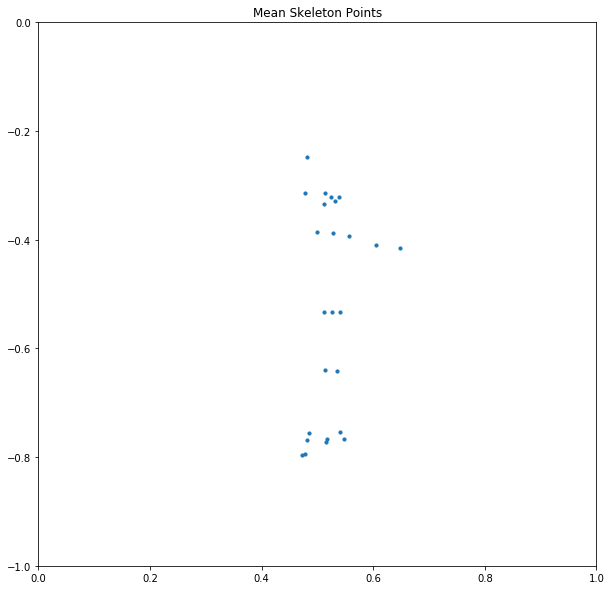

In [7]:
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
            
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [8]:
#calculation of standard deviation values:
import statistics

In [9]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY) 

Standard Deviations of X values: [0.030701512074977358, 0.030645632691721957, 0.030766067925861763, 0.03093503669770508, 0.03159416732367074, 0.031154383520766386, 0.032226592731519704, 0.03550147937128636, 0.031070428261794757, 0.03114301794258335, 0.03156880587439819, 0.032052442629169606, 0.03129052438725113, 0.03051153159067368, 0.03245680828272734, 0.030130918614642968, 0.030353588263923623, 0.030090251093843643, 0.13654348698715535, 0.0317408112274671, 0.031394495809154606, 0.032795604413192764, 0.03185900922999145, 0.03242109553597445, 0.032155521705358764]
Standard Deviations of Y values: [0.03387575586869565, 0.032138273490985136, 0.03214970172651558, 0.03431314740731844, 0.03587618000096936, 0.03145070621606135, 0.03337744897995808, 0.036729360866738316, 0.030702965858842683, 0.030641603907618904, 0.03106027796079911, 0.030962583082414667, 0.03055963524014598, 0.031144739840956153, 0.03177395205389436, 0.03333622754945165, 0.03336329078595917, 0.03397605692275412, 0.088496284

In [10]:
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [11]:
np.save('TenduStdDevX.npy', standardDeviationX)
np.save('TenduStdDevY.npy', standardDeviationY)
np.save('TenduMeanX.npy', avgXList)
np.save('TenduMeanY.npy', avgYList)